In [ ]:
# This code is for new modelling purposes

# Testing

# Build a test model

/var/folders/gy/hwy0sg_d65x2c4t4nrgctwh80000gq/T/ipykernel_2911/3446561675.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
Data info: None


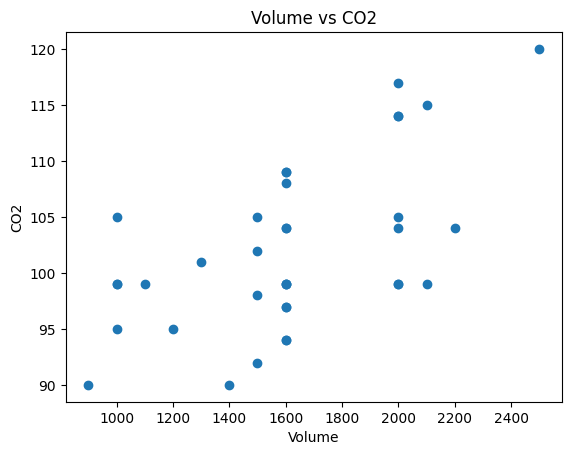

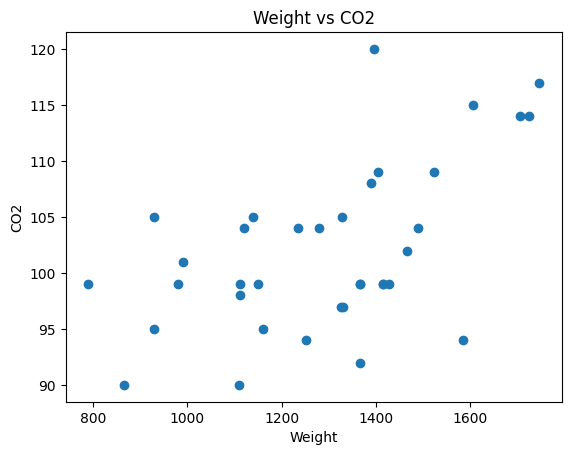

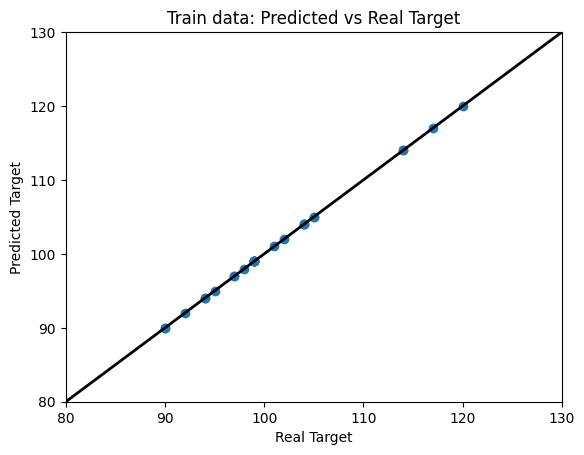

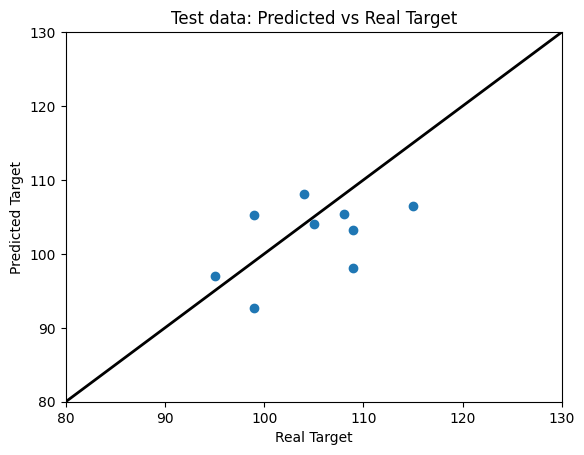

R2 on train is: 1.0
R2 on test is: -0.067698263696234


In [ ]:
###################################### REGRESSION LINEAR
########### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# numpy.random.seed(22)


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


########### import data
df = pd.read_csv("data.csv")

########### data explanation
### Overall
print(f"Data info: {df.info()}")

### Features vs target
# Volume
plt.scatter(df['Volume'], df['CO2'])
plt.title("Volume vs CO2")
plt.xlabel("Volume")
plt.ylabel("CO2")
plt.show()

# Weight
plt.scatter(df['Weight'], df['CO2'])
plt.title("Weight vs CO2")
plt.xlabel("Weight")
plt.ylabel("CO2")
plt.show()


########### preprocessing
### X,y
X = df[['Volume', 'Weight', 'Car', 'Model']]
y = df['CO2']

### scale numeric
scale = StandardScaler()

X_num = X[['Weight', 'Volume']]
X_num_scaled = scale.fit_transform(X_num)

### adjust non-numeric (one hot encoding) 
X_cat = X[['Car', 'Model']]

cars_to_num = pd.get_dummies(X_cat[['Car']])
model_to_num = pd.get_dummies(X_cat[['Model']])
X_num_scaled_df = pd.DataFrame(data= X_num_scaled)
X_num_scaled_df.rename(columns = {0: 'Weight_scaled', 1: 'Volume_scaled'}, inplace = True) 

X_after_preprocess = pd.concat([X_num_scaled_df, cars_to_num, model_to_num], axis=1)

### Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_after_preprocess, y, test_size = 0.25, random_state = 22)

########### modelling
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)


########### applying the model Train/ Test data
predicted_train = reg.predict(X_train)

plt.scatter(y_train, predicted_train)
plt.title('Train data: Predicted vs Real Target')
plt.xlabel("Real Target")
plt.ylabel("Predicted Target")
plt.plot([80, 130], [80, 130], color = 'black', linewidth = 2)
plt.xlim(80, 130)
plt.ylim(80, 130)
plt.show()

predicted_test = reg.predict(X_test)
plt.scatter(y_test, predicted_test)
plt.title('Test data: Predicted vs Real Target')
plt.xlabel("Real Target")
plt.ylabel("Predicted Target")
plt.plot([80, 130], [80, 130], color = 'black', linewidth = 2)
plt.xlim(80, 130)
plt.ylim(80, 130)
plt.show()


########### testing
r2_train = r2_score(y_train, predicted_train)
print(f"R2 on train is: {r2_train}")

r2_test = r2_score(y_test, predicted_test)
print(f"R2 on test is: {r2_test}")

In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SK

In [ ]:
###################################### REGRESSION LOGISTIC
########### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# numpy.random.seed(22)


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import stats

########### import data
df = pd.read_csv("data.csv")

########### data explanation
### Overall
print(f"Data info: {df.info()}")


########### preprocessing
### X,y
X = df[['Volume', 'Weight', 'CO2', 'Model']]
y = df[['Car']]

### scale numeric
scale = StandardScaler()

X_num = X[['Weight', 'Volume', 'CO2']]
X_num_scaled = scale.fit_transform(X_num)

X_num_scaled_df = pd.DataFrame(data= X_num_scaled)
X_num_scaled_df.rename(columns = {0: 'Weight_scaled', 1: 'Volume_scaled', 2: 'CO2_scaled'}, inplace = True) 

### adjust non-numeric (one hot encoding) 
X_cat = X[['Model']]
model_to_num = pd.get_dummies(X_cat[['Model']])


X_after_preprocess = pd.concat([X_num_scaled_df, model_to_num], axis=1)

### Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_after_preprocess, y, test_size = 0.25, random_state = 22)

########### modelling
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)


########### applying the model Train/ Test data
predicted_train = logr.predict(X_train)
predicted_test = logr.predict(X_test)

predicted_train_p = logr.predict_proba(X_train)
predicted_test_p = logr.predict_proba(X_test)

########### testing
print("Train data Spearman corr:", stats.spearmanr(y_train, predicted_train)[0] )
print("Test data Spearman corr:", stats.spearmanr(y_test, predicted_test)[0] )
print("Train data Spearman corr:", stats.spearmanr(y_train, predicted_train_p)[0] )
print("Test data Spearman corr:", stats.spearmanr(y_test, predicted_test_p)[0] )


print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = predicted_train))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = predicted_test))
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = predicted_train_p))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = predicted_test_p))

ImportError: cannot import name 'stats' from 'sklearn' (/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/__init__.py)

In [ ]:
###################################### REGRESSION LOGISTIC with GRID SEARCH
########### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# numpy.random.seed(22)


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# from sklearn import stats

########### import data
df = pd.read_csv("data.csv")

########### data explanation
### Overall
print(f"Data info: {df.info()}")


########### preprocessing
### X,y
X = df[['Volume', 'Weight', 'CO2', 'Model']]
y = df[['Car']]

### scale numeric
scale = StandardScaler()

X_num = X[['Weight', 'Volume', 'CO2']]
X_num_scaled = scale.fit_transform(X_num)

X_num_scaled_df = pd.DataFrame(data= X_num_scaled)
X_num_scaled_df.rename(columns = {0: 'Weight_scaled', 1: 'Volume_scaled', 2: 'CO2_scaled'}, inplace = True) 

### adjust non-numeric (one hot encoding) 
X_cat = X[['Model']]
model_to_num = pd.get_dummies(X_cat[['Model']])


X_after_preprocess = pd.concat([X_num_scaled_df, model_to_num], axis=1)

### Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_after_preprocess, y, test_size = 0.25, random_state = 22)

########### modelling
logr = linear_model.LogisticRegression(max_iter = 1000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logr.set_params(C=choice)
  logr.fit(X_train, y_train)
  scores.append(logr.score(X_train, y_train))

print(scores)


# ########### applying the model Train/ Test data
# predicted_train = logr.predict(X_train)
# predicted_test = logr.predict(X_test)


# ########### testing
# print("Train data Spearman corr:", stats.spearmanr(y_train, predicted_train)[0] )
# print("Test data Spearman corr:", stats.spearmanr(y_test, predicted_test)[0] )

# print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = predicted_train))
# print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = predicted_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
Data info: None
[0.3333333333333333, 0.5185185185185185, 0.7037037037037037, 0.7777777777777778, 1.0, 1.0, 1.0, 1.0]


/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A colu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
Data info: None


/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A colu

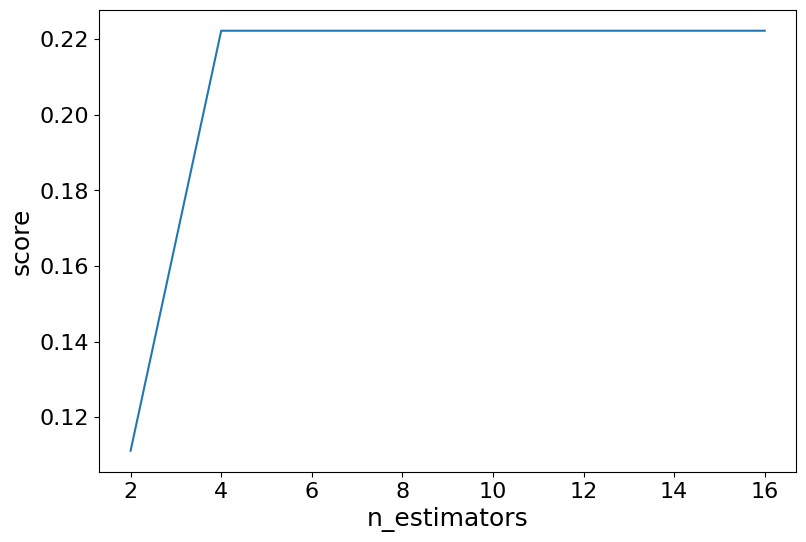

In [ ]:
###################################### Decision tree. Bagging classifier.
########### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# numpy.random.seed(22)


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# from sklearn import stats
from sklearn.ensemble import BaggingClassifier

########### import data
df = pd.read_csv("data.csv")

########### data explanation
### Overall
# print(f"Data info: {df.info()}")


########### preprocessing
### X,y
X = df[['Volume', 'Weight', 'CO2', 'Model']]
y = df[['Car']]

### scale numeric
scale = StandardScaler()

X_num = X[['Weight', 'Volume', 'CO2']]
X_num_scaled = scale.fit_transform(X_num)

X_num_scaled_df = pd.DataFrame(data= X_num_scaled)
X_num_scaled_df.rename(columns = {0: 'Weight_scaled', 1: 'Volume_scaled', 2: 'CO2_scaled'}, inplace = True) 

### adjust non-numeric (one hot encoding) 
X_cat = X[['Model']]
model_to_num = pd.get_dummies(X_cat[['Model']])


X_after_preprocess = pd.concat([X_num_scaled_df, model_to_num], axis=1)

### Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_after_preprocess, y, test_size = 0.25, random_state = 22)

########### modelling
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

################################################

0.0
Train data Spearman corr: 0.8916882417052158
Test data Spearman corr: -0.432670070412212
Train data accuracy: 0.8518518518518519
Test data accuracy: 0.2222222222222222


/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:769: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Users/jc37ne/python-playground/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:775: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


[Text(0.8166666666666667, 0.9444444444444444, 'Model_Fabia <= 0.5\ngini = 0.914\nsamples = 15\nvalue = [2, 0, 2, 3, 1, 2, 2, 1, 3, 0, 3, 3, 2, 0\n1, 2]'),
 Text(0.75, 0.8333333333333334, 'Model_Insignia <= 0.5\ngini = 0.906\nsamples = 14\nvalue = [2, 0, 2, 3, 1, 2, 2, 1, 3, 0, 3, 0, 2, 0\n1, 2]'),
 Text(0.6833333333333333, 0.7222222222222222, 'Volume_scaled <= 1.144\ngini = 0.898\nsamples = 13\nvalue = [2, 0, 2, 3, 1, 2, 2, 1, 3, 0, 0, 0, 2, 0\n1, 2]'),
 Text(0.5, 0.6111111111111112, 'Weight_scaled <= -0.014\ngini = 0.879\nsamples = 10\nvalue = [2, 0, 2, 3, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0\n1, 2]'),
 Text(0.3333333333333333, 0.5, 'Volume_scaled <= -0.55\ngini = 0.81\nsamples = 7\nvalue = [0, 0, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0\n1, 0]'),
 Text(0.2, 0.3888888888888889, 'Model_I20 <= 0.5\ngini = 0.735\nsamples = 4\nvalue = [0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0\n1, 0]'),
 Text(0.13333333333333333, 0.2777777777777778, 'CO2_scaled <= -0.888\ngini = 0.64\nsamples = 3\nvalue = [0, 0, 2, 0, 0

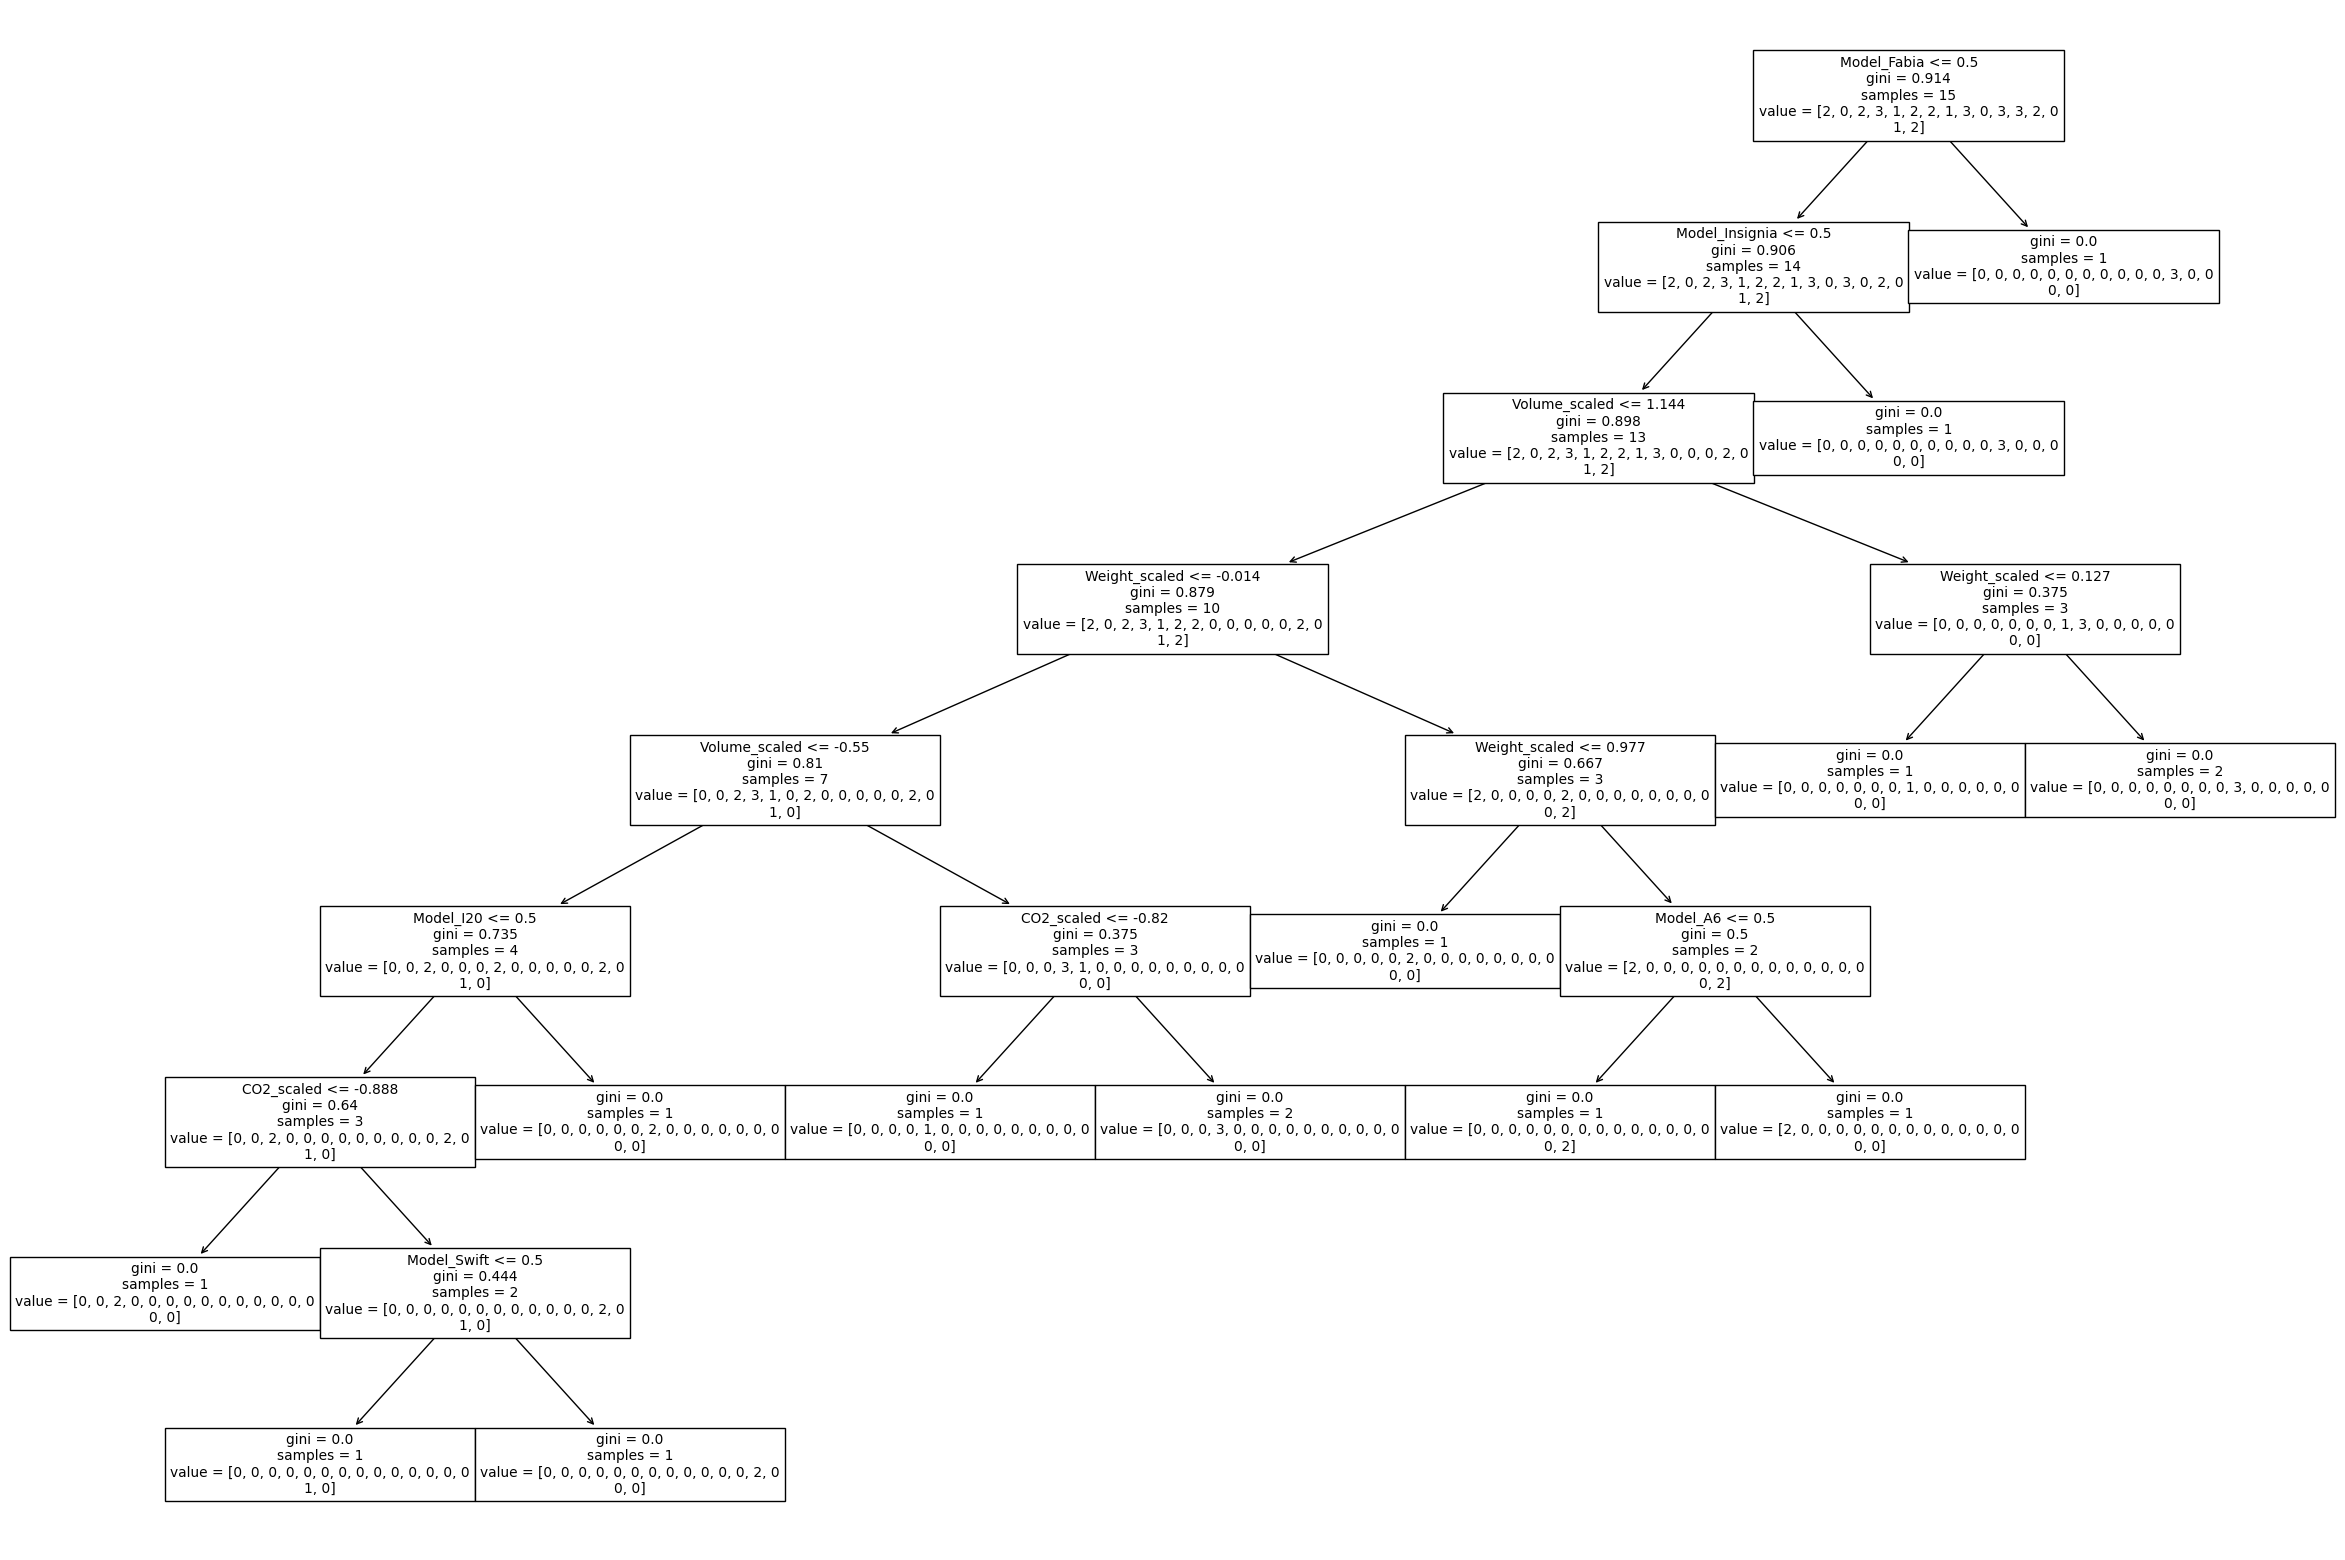

In [ ]:
###################################### Decision tree. Bagging classifier. OOB imp.
########### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# numpy.random.seed(22)


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# from sklearn import stats
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

########### import data
df = pd.read_csv("data.csv")

########### data explanation
### Overall
# print(f"Data info: {df.info()}")


########### preprocessing
### X,y
X = df[['Volume', 'Weight', 'CO2', 'Model']]
y = df[['Car']]

### scale numeric
scale = StandardScaler()

X_num = X[['Weight', 'Volume', 'CO2']]
X_num_scaled = scale.fit_transform(X_num)

X_num_scaled_df = pd.DataFrame(data= X_num_scaled)
X_num_scaled_df.rename(columns = {0: 'Weight_scaled', 1: 'Volume_scaled', 2: 'CO2_scaled'}, inplace = True) 

### adjust non-numeric (one hot encoding) 
X_cat = X[['Model']]
model_to_num = pd.get_dummies(X_cat[['Model']])


X_after_preprocess = pd.concat([X_num_scaled_df, model_to_num], axis=1)

### Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_after_preprocess, y, test_size = 0.25, random_state = 22)

########### modelling
oob_model = BaggingClassifier(n_estimators = 4, oob_score = True,random_state = 22)
oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

########### applying the model Train/ Test data
predicted_train = oob_model.predict(X_train)
predicted_test = oob_model.predict(X_test)


########### testing
print("Train data Spearman corr:", stats.spearmanr(y_train, predicted_train)[0] )
print("Test data Spearman corr:", stats.spearmanr(y_test, predicted_test)[0] )

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = predicted_train))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = predicted_test))

#############################################################
plt.figure(figsize=(30, 20))
plot_tree(clf.estimators_[0], feature_names = X_after_preprocess.columns)
################################################

In [ ]:
###################################### Decision tree. CV(k-fold / sk-fold / LeaveOneOut / LeavePOut / ShuffleSplit)
########### libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# numpy.random.seed(22)


from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
# from sklearn import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, cross_val_score

########### import data
df = pd.read_csv("data.csv")

########### data explanation
### Overall
print(f"Data info: {df.info()}")


########### preprocessing
### X,y
X = df[['Volume', 'Weight', 'CO2', 'Model']]
y = df[['Car']]

### scale numeric
scale = StandardScaler()

X_num = X[['Weight', 'Volume', 'CO2']]
X_num_scaled = scale.fit_transform(X_num)

X_num_scaled_df = pd.DataFrame(data= X_num_scaled)
X_num_scaled_df.rename(columns = {0: 'Weight_scaled', 1: 'Volume_scaled', 2: 'CO2_scaled'}, inplace = True) 

### adjust non-numeric (one hot encoding) 
X_cat = X[['Model']]
model_to_num = pd.get_dummies(X_cat[['Model']])


X_after_preprocess = pd.concat([X_num_scaled_df, model_to_num], axis=1)

### Train/Test & Model & TEST

clf = DecisionTreeClassifier(random_state=42)

# k_folds = KFold(n_splits = 10)
# scores = cross_val_score(clf, X_after_preprocess, y, cv = k_folds)

# sk_folds = StratifiedKFold(n_splits = 3)
# scores = cross_val_score(clf, X_after_preprocess, y, cv = sk_folds)

# loo = LeaveOneOut()
# scores = cross_val_score(clf, X_after_preprocess, y, cv = loo)

# lpo = LeavePOut(p=5)
# scores = cross_val_score(clf, X_after_preprocess, y, cv = lpo)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
scores = cross_val_score(clf, X_after_preprocess, y, cv = ss)


print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))





# ###########################################################
# X_train, X_test, y_train, y_test = train_test_split(X_after_preprocess, y, test_size = 0.25, random_state = 22)

# ########### modelling
# logr = linear_model.LogisticRegression()
# logr.fit(X_train, y_train)


# ########### applying the model Train/ Test data
# predicted_train = logr.predict(X_train)
# predicted_test = logr.predict(X_test)


# ########### testing
# print("Train data Spearman corr:", stats.spearmanr(y_train, predicted_train)[0] )
# print("Test data Spearman corr:", stats.spearmanr(y_test, predicted_test)[0] )

# print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = predicted_train))
# print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = predicted_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
Data info: None
Cross Validation Scores:  [0.         0.09090909 0.         0.09090909 0.        ]
Average CV Score:  0.03636363636363636
Number of CV Scores used in Average:  5
